# Apuntes Pandas 3: Operaciones con Datos

Como ya hemos comentado Pandas esta escrita sobre la libreria NumPy y podemos hacer uso de sus modulos, incluyendo las facilidades de operaciones entre sus objetos, los Array, que son utilizados para crear las series y dataframes en pandas, entre otros.

Por tanto las estructuras de pandas **tambien disponen de este comportamiento**

A continuacion veremos los diferentes enfoques para operar con datos en pandas, dependiendo del tipo de estructura y el tipo de operacion que se quiera realizar.

Hay 2 grandes grupos donde recogeremos esta informacion:

- **Operaciones con estructuras basicas de pandas , de 1 dimension con uno o 2 indices (series o dataframes)**
- **Operaciones con estructuras complejas de pandas**

## Operaciones con estructuras basicas: *Operaciones binarias (alineacion de indices)*

Las operaciones mas basicas que podemos hacer con las estructuras son con **operadores aritmeticos.**

Como ya mencionabamos, al ser estructuras basadas en los Arrays, es posible realizar operaciones directamente sobre las estructuras, para ello pandas hace uso de una funcionalidad para poder llevarlo a cabo: *alinea los indices*

> Es decir, **empareja los elementos de ambas variables que se operan que tengan el mismo índice** ya sea posicional o por etiqueta

Tienes estas caracteristicas, tanto para operar series o dataframes entre si:

- Los valores que no se pueden calcular entres si o que no tiene un indice igual **dara como resultado NaN (*Not a Number*)**
  > Si intentas operar un **NaN** dara como resultado un NaN
  >
- El resultado incluye **todos los índices que aparecen en cualquiera de las dos variables**
  > Si intentas operar **series y dataframes con operadores aritmeticos** dara como resultados NaN
  >
- En los dataframes, **se alinean tanto filas como columnas**

In [24]:
import pandas as pd

dataframe1 = pd.DataFrame({"Posicion abecedario":[10, 31, 27, 38, 3], "Silabas":[2,2,3,4,3],"Vocales":[2,2,3,5,3],"Consonantes":[3,4,3,4,3]}, index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
dataframe2 = pd.DataFrame({"Posicion abecedario":[3, 27, 31, 3, 3], "Silabas":[2,2,3,3,2],"Vocales":[2,3,3,3,2],"Consonantes":[4,3,4,4,3]}, index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
print(dataframe1)
print(40*"-")
print(dataframe2)
print(40*"-")
calculo1 = dataframe2 * dataframe1
print(calculo1)

           Posicion abecedario  Silabas  Vocales  Consonantes
Jamon                       10        2        2            3
Trucha                      31        2        2            4
Pomelo                      27        3        3            3
Zanahoria                   38        4        5            4
Cereza                       3        3        3            3
----------------------------------------
           Posicion abecedario  Silabas  Vocales  Consonantes
Jamon                        3        2        2            4
Trucha                      27        2        3            3
Pomelo                      31        3        3            4
Zanahoria                    3        3        3            4
Cereza                       3        2        2            3
----------------------------------------
           Posicion abecedario  Silabas  Vocales  Consonantes
Jamon                       30        4        4           12
Trucha                     837        4        6  

> **TIP**: Las estructuras tienen que tener las mismas dimensiones y/o mismos indices si se quiere operar con operadores numericos directamente, sino dara todos los valores Nan

In [ ]:
import pandas as pd

dataframe1 = pd.DataFrame({"Posicion abecedario":[10, 31, 27, 38, 3], "Silabas":[2,2,3,4,3],"Vocales":[2,2,3,5,3],"Consonantes":[3,4,3,4,3]}, index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
series1 = pd.Series([0.4, 0.5, 0.8, 0.9, 0.6], index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
print(dataframe1)
print(40*"-")
print(series1)
print(40*"-")
calculo1 = series1*dataframe1
print(calculo1)

Por ultimo, es posible operar **series con dataframes, en todos sus elementos, haciendo uso de funciones de calculo** y no operadores aritmeticos.

Estos modulos, incluyen un argumento ***axis*** que nos permite elegir si queremos realizar el calculo por filas o por columnas

- Por filas se realiza por defecto
- Por columnas se indicara ***axis=0***

A continuacion se indican los modulos:

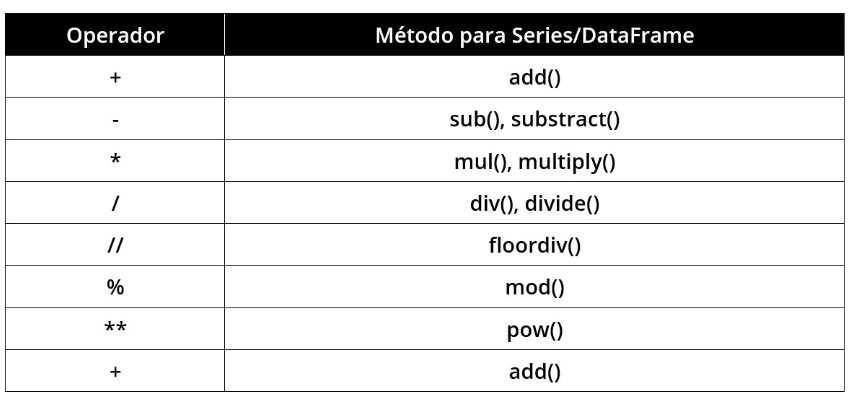

In [3]:
import pandas as pd

dataframe1 = pd.DataFrame({"Posicion abecedario":[10, 31, 27, 38, 3], "Silabas":[2,2,3,4,3],"Vocales":[2,2,3,5,3],"Consonantes":[3,4,3,4,3]}, index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
series1 = pd.Series([0.4, 0.5, 0.8, 0.9, 0.6], index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
print(dataframe1)
print(40*"-")
print(series1)
print(40*"-")
calculo1 = dataframe1.multiply(series1, axis=0)
print(calculo1)

           Posicion abecedario  Silabas  Vocales  Consonantes
Jamon                       10        2        2            3
Trucha                      31        2        2            4
Pomelo                      27        3        3            3
Zanahoria                   38        4        5            4
Cereza                       3        3        3            3
----------------------------------------
Jamon        0.4
Trucha       0.5
Pomelo       0.8
Zanahoria    0.9
Cereza       0.6
dtype: float64
----------------------------------------
           Posicion abecedario  Silabas  Vocales  Consonantes
Jamon                      4.0      0.8      0.8          1.2
Trucha                    15.5      1.0      1.0          2.0
Pomelo                    21.6      2.4      2.4          2.4
Zanahoria                 34.2      3.6      4.5          3.6
Cereza                     1.8      1.8      1.8          1.8


## Operaciones con estructuras basicas: *Trabajando con NaN o Nulos*

Como hemos podido comprobar ya a traves de NumPy y anteriormente, generalmente trabajando con datos existiran fallas de informacion o valores no validos con los que vamos a tener que operar.

Para poder lidiar con ellos, pandas ofrece varios metodos para poder operar con ellos.

- ***.isnull() o .notnull()***: Para comprobar si hay o no NaN / valores nulos.
> Podemos utilizar estos modulos para **realizar una valoracion de una operacion** entre estructuras y asi saber de antemano que **elementos van ser NaN**

In [5]:
import pandas as pd

dataframe1 = pd.DataFrame({"Posicion abecedario":[10, 31, 27, 38, 3], "Silabas":[2,2,3,4,3],"Vocales":[2,2,3,5,3],"Consonantes":[3,4,3,4,3]}, index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
series1 = pd.Series([0.4, 0.5, 0.8, 0.9, 0.6], index = ["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])
calculo1 = series1*dataframe1
print(calculo1.isnull())

           Cereza  Consonantes  Jamon  Pomelo  Posicion abecedario  Silabas  \
Jamon        True         True   True    True                 True     True   
Trucha       True         True   True    True                 True     True   
Pomelo       True         True   True    True                 True     True   
Zanahoria    True         True   True    True                 True     True   
Cereza       True         True   True    True                 True     True   

           Trucha  Vocales  Zanahoria  
Jamon        True     True       True  
Trucha       True     True       True  
Pomelo       True     True       True  
Zanahoria    True     True       True  
Cereza       True     True       True  


- ***dropna()***: Elimina o ignora los valores NaN / Nulos, para que no influyan en el resultado final.

In [18]:
import pandas as pd

dataframe1 = pd.DataFrame({
    "Posicion abecedario": [10, 31, 27, 38, 3], 
    "Silabas": [None, 2, 3, 4, 3],
    "Vocales": [2, 2, 3, 5, 3], 
    "Consonantes": [3, 4, 3, 4, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])

dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = dataframe2 * dataframe1
print(calculo1)
print("\n" + 40*"-" + "\n")
print(calculo1.dropna())

           Posicion abecedario  Silabas  Vocales  Consonantes
Aguacate                   NaN      NaN      NaN          NaN
Cereza                    15.0      6.0      6.0          9.0
Jamon                     30.0      NaN      4.0          9.0
Pomelo                   837.0      9.0     15.0         15.0
Trucha                   837.0      4.0      6.0         16.0
Zanahoria                114.0     12.0     15.0         16.0

----------------------------------------

           Posicion abecedario  Silabas  Vocales  Consonantes
Cereza                    15.0      6.0      6.0          9.0
Pomelo                   837.0      9.0     15.0         15.0
Trucha                   837.0      4.0      6.0         16.0
Zanahoria                114.0     12.0     15.0         16.0


- ***.fillna()*** permite intercambiar los NaN por un valor especificado.

> Es tan comun utilizar esta funcion que en **los modulos de operaciones** (*add,mul,div...*) se incluye un argumento para esto
>
> > ***"serie/dataframe"."modulo operador"("serie/dataframe", fill_value = "valor a sustituir los NaN")***

In [19]:
import pandas as pd

dataframe1 = pd.DataFrame({
    "Posicion abecedario": [10, 31, 27, 38, 3], 
    "Silabas": [None, 2, 3, 4, 3],
    "Vocales": [2, 2, 3, 5, 3], 
    "Consonantes": [3, 4, 3, 4, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])

dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = dataframe2 * dataframe1
print(calculo1)
print("\n" + 40*"-" + "\n")
print(calculo1.fillna(10000))

           Posicion abecedario  Silabas  Vocales  Consonantes
Aguacate                   NaN      NaN      NaN          NaN
Cereza                    15.0      6.0      6.0          9.0
Jamon                     30.0      NaN      4.0          9.0
Pomelo                   837.0      9.0     15.0         15.0
Trucha                   837.0      4.0      6.0         16.0
Zanahoria                114.0     12.0     15.0         16.0

----------------------------------------

           Posicion abecedario  Silabas  Vocales  Consonantes
Aguacate               10000.0  10000.0  10000.0      10000.0
Cereza                    15.0      6.0      6.0          9.0
Jamon                     30.0  10000.0      4.0          9.0
Pomelo                   837.0      9.0     15.0         15.0
Trucha                   837.0      4.0      6.0         16.0
Zanahoria                114.0     12.0     15.0         16.0


In [21]:
import pandas as pd

dataframe1 = pd.DataFrame({
    "Posicion abecedario": [10, 31, 27, 38, 3], 
    "Silabas": [None, 2, 3, 4, 3],
    "Vocales": [2, 2, 3, 5, 3], 
    "Consonantes": [3, 4, 3, 4, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza"])

dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = dataframe2.add(dataframe1, fill_value = 30000)
print(calculo1)

           Posicion abecedario  Silabas  Vocales  Consonantes
Aguacate               30007.0  30009.0  30004.0      30003.0
Cereza                     8.0      5.0      5.0          6.0
Jamon                     13.0  30002.0      4.0          6.0
Pomelo                    58.0      6.0      8.0          8.0
Trucha                    58.0      4.0      5.0          8.0
Zanahoria                 41.0      7.0      8.0          8.0


## Operaciones con estructuras basicas: *Funciones matematicas de NumPy*

Como ya hemos mencionado, estas estructuras basadas en los Arrays de NumPy pueden hacer uso de modulos de la libreria.

Esto incluyen las funciones matematicas tales como: *np.sqrt():*, *np.exp():*,...

In [22]:
import pandas as pd
import numpy as np
dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = np.sqrt(dataframe2)
print(calculo1)

           Posicion abecedario   Silabas   Vocales  Consonantes
Jamon                 1.732051  1.414214  1.414214     1.732051
Trucha                5.196152  1.414214  1.732051     2.000000
Pomelo                5.567764  1.732051  2.236068     2.236068
Zanahoria             1.732051  1.732051  1.732051     2.000000
Cereza                2.236068  1.414214  1.414214     1.732051
Aguacate              2.645751  3.000000  2.000000     1.732051


## Operaciones con estructuras basicas: *Funciones de agregación y estadistica de NumPy*

Al igual que sucedia antes, podemos hacer uso de las funciones de agregacion y estadistica de Numpy para nuestras estructuras en pandas.

Pandas añade algunas diferencias en el comportamiento a tener en cuenta:

- **Por defecto se calcularan por filas** y tambien es posible realizar los calculos por **columnas** si indicas el argumento ***(axis = "columns")***
  
- Los valores NaN **son omitidos para realizar el calculo** para no intorpecer el resultado final
  
> Se pueden tener en cuenta incluyendo el argumento (***skipna = False)***

A continuacion a aparecen las funciones que podemos hacer uso:

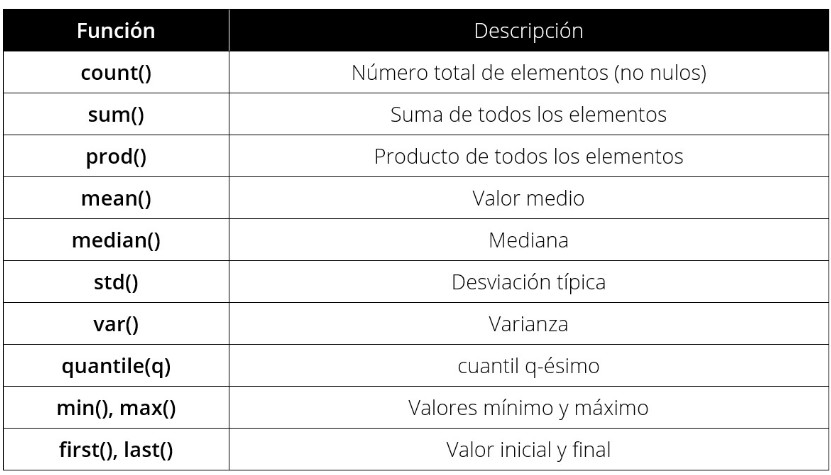

In [23]:
import pandas as pd
import numpy as np
dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = dataframe2.mean(axis = "columns")
print(calculo1)

Jamon         2.50
Trucha        9.00
Pomelo       11.00
Zanahoria     3.25
Cereza        3.00
Aguacate      5.75
dtype: float64


In [25]:
import pandas as pd
import numpy as np
dataframe2 = pd.DataFrame({
    "Posicion abecedario": [3, 27, 31, 3, 5, 7], 
    "Silabas": [2, 2, 3, 3, 2, 9], 
    "Vocales": [2, 3, 5, 3, 2, 4], 
    "Consonantes": [3, 4, 5, 4, 3, 3]
}, index=["Jamon", "Trucha", "Pomelo", "Zanahoria", "Cereza", "Aguacate"]) 
calculo1 = dataframe2.mean(skipna = False)
print(calculo1)

Posicion abecedario    12.666667
Silabas                 3.500000
Vocales                 3.166667
Consonantes             3.666667
dtype: float64


## Operaciones con estructuras complejas: *Indices Jerarquicos*

Hasta ahora todas las estructuras con las que habiamos operado en pandas, es decir, las series y los dataframes tenian en común que eran estructuras de datos de **que disponen de 1 dimension**.

La mayoria de las veces estas estructuras seran suficientes pero a veces tendremos que trabajar con estructuras mas complejas:

- Estructuras con 2 o mas dimensiones
- Estructuras con dimensiones con varios niveles.

Para ello pandas ofrece la posibilidad de **definir indices multi nivel**

Estos indices Multinivel nos van a permitir:

- Definirlos y resetear indices para filas
- Seleccionar elementos
- Definir y resetear indices para columnas

### Definir indices jerarquicos para filas

Haremos uso de la funcion ***.set_index()*** y el argumento ***inplace = True***

>***.set_index(["indice 1", "indice 2",...], inplace = True)***
>
>> Con el *inplace = True* le indicamos que queremos que modifique el contenido o estructura de la propia variable

In [26]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [38]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
print(meteo_mes.head(8))
print("\n"+40*"-"+"\n")
meteo_mes.set_index(["año","mes"], inplace =True)
print(meteo_mes.head(10))

    año  mes     ciudad  temp_c  viento_vel_kmh
0  2015    1  Barcelona     9.1            17.7
1  2015    1     Bilbao     9.1             8.7
2  2015    1  La Coruña     9.6            10.8
3  2015    1     Madrid     4.4             9.0
4  2015    1     Malaga    11.4            13.6
5  2015    1    Sevilla     9.6             8.9
6  2015    1   Valencia    10.1            11.3
7  2015    1   Zaragoza     6.0            18.8

----------------------------------------

             ciudad  temp_c  viento_vel_kmh
año  mes                                   
2015 1    Barcelona     9.1            17.7
     1       Bilbao     9.1             8.7
     1    La Coruña     9.6            10.8
     1       Madrid     4.4             9.0
     1       Malaga    11.4            13.6
     1      Sevilla     9.6             8.9
     1     Valencia    10.1            11.3
     1     Zaragoza     6.0            18.8
     2    Barcelona     9.0            15.4
     2       Bilbao     8.0            11

> Estos indices multinivel son definidos en pandas como **MultiIndex** y se componen de ***levels*** son los nº de niveles que existen
>
> > En el siguiente ejemplo *el 1º nivel* son [2015, 2016] y *el 2º nivel* son del (1 al 12)

In [41]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["año","mes"], inplace =True)
meteo_mes.index

MultiIndex([(2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  1),
            (2015,  2),
            (2015,  2),
            ...
            (2016, 11),
            (2016, 11),
            (2016, 12),
            (2016, 12),
            (2016, 12),
            (2016, 12),
            (2016, 12),
            (2016, 12),
            (2016, 12),
            (2016, 12)],
           names=['año', 'mes'], length=192)

> Si quisieramos redefinir el indice para poner mas niveles, **primero debemos resetearlo y luego indicarlo de nuevo**, haciendo uso en todo momento del argumento *inplace = True*

In [42]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["año","mes"], inplace =True)
print(meteo_mes.head(10))
print("\n"+40*"-"+"\n")
meteo_mes.reset_index(inplace = True)
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
print(meteo_mes.head(10))

             ciudad  temp_c  viento_vel_kmh
año  mes                                   
2015 1    Barcelona     9.1            17.7
     1       Bilbao     9.1             8.7
     1    La Coruña     9.6            10.8
     1       Madrid     4.4             9.0
     1       Malaga    11.4            13.6
     1      Sevilla     9.6             8.9
     1     Valencia    10.1            11.3
     1     Zaragoza     6.0            18.8
     2    Barcelona     9.0            15.4
     2       Bilbao     8.0            11.5

----------------------------------------

                    temp_c  viento_vel_kmh
ciudad    año  mes                        
Barcelona 2015 1       9.1            17.7
Bilbao    2015 1       9.1             8.7
La Coruña 2015 1       9.6            10.8
Madrid    2015 1       4.4             9.0
Malaga    2015 1      11.4            13.6
Sevilla   2015 1       9.6             8.9
Valencia  2015 1      10.1            11.3
Zaragoza  2015 1       6.0            18.8

### Seleccionar datos de indices multi nivel

Para poder seleccionar datos multi nivel, haremos uso de la funcion ***.loc()***, podemos utilizarlo de varias formas:

- Podemos querer **seleccionar unicamente un elemento** en ese caso utilizaremos las etiquetas de los indices del multi indice

In [53]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
print(meteo_mes.loc[("Zaragoza", 2016, 5),:])

temp_c            17.3
viento_vel_kmh    19.9
Name: (Zaragoza, 2016, 5), dtype: float64


- Podemos seleccionar **un nivel del indice, buscando por el 1º nivel**

> Nos aparecera el siguiente mensaje:
>
> > *PerformanceWarning: indexing past lexsort depth may impact performance. print("metodo")*
> >
> > > Nos indica que no es el mejor modo de buscar algo, aunque funcione igual, la ejecución sera mas lenta.

In [54]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
print(meteo_mes.loc[("Zaragoza",),:])

          temp_c  viento_vel_kmh
año  mes                        
2015 1       6.0            18.8
     2       6.2            22.8
     3      11.0            19.8
     4      14.5            15.4
     5      19.1            21.4
     6      23.1            16.2
     7      26.5            19.3
     8      24.4            15.6
     9      19.5            15.4
     10     15.8            14.6
     11     11.4            13.3
     12      6.9             5.9
2016 1       8.7            13.2
     2       8.8            20.3
     3       9.5            21.1
     4      13.4            19.2
     5      17.3            19.9
     6      22.6            18.7
     7      25.3            20.6
     8      25.2            19.3
     9      22.6            15.6
     10     16.3            11.9
     11     10.0            13.4
     12      6.2             8.4


C:\Users\insau\AppData\Local\Temp\ipykernel_17076\2727936158.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(meteo_mes.loc[("Zaragoza",),:])


> Para solucionar esto, lo recomendable es reordenar el indice usando ***.sort_index()***
>
> >Se puede reordenar por filas ***axis = 0***
> >
> >Se puede reodena por niveles ***level = 0***

In [56]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
meteo_mes.sort_index(level=0, axis=0, inplace=True)
print(meteo_mes.loc[("Zaragoza",),:])

          temp_c  viento_vel_kmh
año  mes                        
2015 1       6.0            18.8
     2       6.2            22.8
     3      11.0            19.8
     4      14.5            15.4
     5      19.1            21.4
     6      23.1            16.2
     7      26.5            19.3
     8      24.4            15.6
     9      19.5            15.4
     10     15.8            14.6
     11     11.4            13.3
     12      6.9             5.9
2016 1       8.7            13.2
     2       8.8            20.3
     3       9.5            21.1
     4      13.4            19.2
     5      17.3            19.9
     6      22.6            18.7
     7      25.3            20.6
     8      25.2            19.3
     9      22.6            15.6
     10     16.3            11.9
     11     10.0            13.4
     12      6.2             8.4


### Definir indices jerarquicos para columnas

Al igual que hacemos con las filas, podemos definir y resetear indices de columnas.

**1º generaremos un Multi Index con .concat()**:
> Es una funcionalidad que se utiliza al combinar dataframes haciendo uso de ***pd.concat()*** que añade las filas de cada elemento concatenado.
>
> > Por defecto al concatenar **se añaden las filas al final del anterior** con el argumento *axis = 0*
> >
> > Tambien al concatenar **podemos añadir columnas al final del anterior** con el argumento *axis = 1*
> >
> > > Por ultimo es importante tener en cuenta que el dataframe resultante **tiene que tener las columnas necesarias y no todas**

In [61]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
print(combi.head(5))

          temp_c  viento_vel_kmh  temp_c  viento_vel_kmh  temp_c  \
año  mes                                                           
2015 1       6.0            18.8    11.4            13.6     4.4   
     2       6.2            22.8    12.0            16.8     6.4   
     3      11.0            19.8    14.8            13.9    10.3   
     4      14.5            15.4    17.1            11.3    14.2   
     5      19.1            21.4    20.6            10.8    19.8   

          viento_vel_kmh  
año  mes                  
2015 1               9.0  
     2              13.3  
     3              10.4  
     4              10.3  
     5              11.8  


C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1567560217.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1567560217.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1567560217.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


Para poder crear los indices multinivel utilizaremos la clase **MultiIndex**

> ***pd.MultiIndex***
>

Uno de los metodos que podemos utilizar para generar estos indice smultinivel en columnas es el metodo ***.from_product()*** que permite definir diferentes niveles de indices con sus nombres por columnas

> ***pd.MultiIndex.from_product([["lista con nombres de las columnas del 1º nivel"],["lista con nombres de las columnas del 2º nivel"],... names = ["nombres de los niveles"]])***
>
> > Tendra que haber tantos nombres de niveles por niveles creados



In [64]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
multi_columnas = pd.MultiIndex.from_product([["Zaragoza", "Malaga", "Madrid"], ["temp_c","viento_vel_kmh"]], names = ["region", "KPI's"])
combi.columns = multi_columnas
combi.head(8)

C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1252644235.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1252644235.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1252644235.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


region   Zaragoza                Malaga                Madrid               
KPI's      temp_c viento_vel_kmh temp_c viento_vel_kmh temp_c viento_vel_kmh
año  mes                                                                    
2015 1        6.0           18.8   11.4           13.6    4.4            9.0
     2        6.2           22.8   12.0           16.8    6.4           13.3
     3       11.0           19.8   14.8           13.9   10.3           10.4
     4       14.5           15.4   17.1           11.3   14.2           10.3
     5       19.1           21.4   20.6           10.8   19.8           11.8
     6       23.1           16.2   23.1           10.5   24.3           10.0
     7       26.5           19.3   28.0           10.9   29.9           10.8
     8       24.4           15.6   28.9           11.8   25.9           11.7

Una vez definido los indices multinivel por columnas, es posible realizar selecciones de datos mas o menos complejas, ahora vienen explicadas:

- Se pueden seleccionar datos **solo del primer nivel**

> ***"nombre dataframe["nombre columna indice 1º nivel"].head()***

In [66]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
multi_columnas = pd.MultiIndex.from_product([["Zaragoza", "Malaga", "Madrid"], ["temp_c","viento_vel_kmh"]], names = ["region", "KPI's"])
combi.columns = multi_columnas
combi["Madrid"].head(8)

C:\Users\insau\AppData\Local\Temp\ipykernel_17076\983039185.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\983039185.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\983039185.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


KPI's     temp_c  viento_vel_kmh
año  mes                        
2015 1       4.4             9.0
     2       6.4            13.3
     3      10.3            10.4
     4      14.2            10.3
     5      19.8            11.8
     6      24.3            10.0
     7      29.9            10.8
     8      25.9            11.7

- Se pueden seleccionar datos **de todos los niveles**

> ***"nombre dataframe[("nombre columna indice 1º nivel","nombre columna indice 2º nivel",...)].head()***

In [67]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
multi_columnas = pd.MultiIndex.from_product([["Zaragoza", "Malaga", "Madrid"], ["temp_c","viento_vel_kmh"]], names = ["region", "KPI's"])
combi.columns = multi_columnas
combi[("Madrid","viento_vel_kmh")].head(8)

C:\Users\insau\AppData\Local\Temp\ipykernel_17076\837402328.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\837402328.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\837402328.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


año   mes
2015  1       9.0
      2      13.3
      3      10.4
      4      10.3
      5      11.8
      6      10.0
      7      10.8
      8      11.7
Name: (Madrid, viento_vel_kmh), dtype: float64

- Se pueden seleccionar datos **por filas y columnas simultaneamente para el 1º nivel del indice de las columnas**

> ***"nombre dataframe".loc[("nombre fila indice 1º nivel", "nombre fila indice 2º nivel",...), "nombre columna indice 1º nivel"]***

In [71]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
multi_columnas = pd.MultiIndex.from_product([["Zaragoza", "Malaga", "Madrid"], ["temp_c","viento_vel_kmh"]], names = ["region", "KPI's"])
combi.columns = multi_columnas
combi.loc[(2015,[1,2]),"Zaragoza"]

C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1693384014.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1693384014.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\1693384014.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


KPI's     temp_c  viento_vel_kmh
año  mes                        
2015 1       6.0            18.8
     2       6.2            22.8

- Se pueden seleccionar datos **por filas y columnas simultaneamente varios niveles del indice de las columnas** haciendo uso de la clase **IndexSlice**

> 1º creamos un objeto de la clase
>
> > ***nombre variable = pd.IndexSlice***
> >
> 2º Lo utilizamos con **.loc**
> 
>> ***"nombre dataframe".loc["nombre variable"["nombre fila indice 1º nivel", "nombre fila indice 2º nivel",...], "nombre variable" ["nombre columna indice 1º nivel","nombre columna indice 2º nivel"],...]***

In [74]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Ruta = Path(r"C:\proyecto-faust\M02_Python_Librerias_Big_Data\UX_Material_Extra_Librerias\U10_datasets\meteo_mes_agg.csv")
meteo_mes = pd.read_csv(Ruta, sep = ";")
meteo_mes.set_index(["ciudad","año","mes"], inplace =True)
zaragoza = meteo_mes.loc[("Zaragoza",),:]
malaga = meteo_mes.loc[("Malaga",),:]
madrid = meteo_mes.loc[("Madrid",),:]
combi = pd.concat([zaragoza, malaga, madrid], axis=1)
multi_columnas = pd.MultiIndex.from_product([["Zaragoza", "Malaga", "Madrid"], ["temp_c","viento_vel_kmh"]], names = ["region", "KPI's"])
combi.columns = multi_columnas
inx = pd.IndexSlice
combi.loc[inx[2015, 1:2],inx["Zaragoza", :]]

C:\Users\insau\AppData\Local\Temp\ipykernel_17076\3010388932.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  zaragoza = meteo_mes.loc[("Zaragoza",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\3010388932.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  malaga = meteo_mes.loc[("Malaga",),:]
C:\Users\insau\AppData\Local\Temp\ipykernel_17076\3010388932.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  madrid = meteo_mes.loc[("Madrid",),:]


region   Zaragoza               
KPI's      temp_c viento_vel_kmh
año  mes                        
2015 1        6.0           18.8
     2        6.2           22.8